In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Variables

In [10]:
ticker = 'GBPUSD=X'
label = 'POUND/DOLLAR'
window = 5
timespan = 365

# Initial Data Gathering and Calculations

[*********************100%***********************]  1 of 1 completed


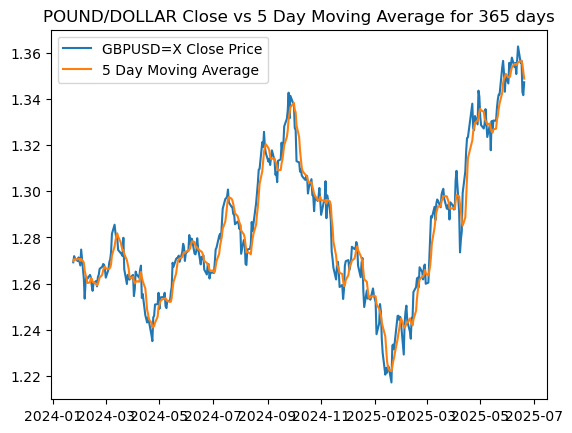

In [11]:
df = yf.download(ticker,  auto_adjust=True)
df['MovingAverage'] = df['Close'].rolling(window).mean()
df = df.iloc[-timespan:, :]

df = df.iloc[:, :]
plt.plot(df['Close'])
plt.plot(df['MovingAverage'])
plt.legend([f'{ticker} Close Price', f'{window} Day Moving Average'])
plt.title(f'{label} Close vs {window} Day Moving Average for {timespan} days');

# Creating a Strategy

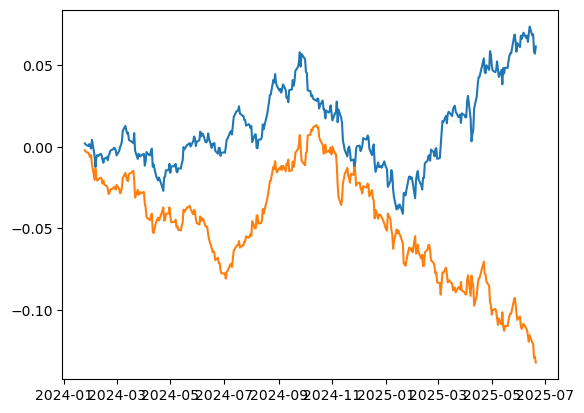

In [16]:
df.columns = df.columns.get_level_values(0)

def add_MovingAverage_Strategy(df):
    df['Strategy'] = np.where(df['Close'] > df['MovingAverage'],1,-1)
    return df

df = add_MovingAverage_Strategy(df)
df['asset_cumultative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) -1

plt.plot(df['asset_cumultative'])
plt.plot(df['strategy_cumulative'])

# Backtesting and Plotting the Strategy

[*********************100%***********************]  1 of 1 completed

GBPUSD=X Buy & Hold Return: 6.15%
5-Day MA Strategy Return: -13.21%


Price,Close,High,Low,Open,Volume,MovingAverage,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
2024-01-24,1.269197,1.277368,1.268681,1.269422,0,1.269710,NaN,NaN,NaN
2024-01-25,1.271876,1.274226,1.269293,1.271844,0,1.270549,-1.0,0.002111,-0.002111
2024-01-26,1.270826,1.275754,1.267732,1.270696,0,1.270516,1.0,0.001284,-0.002936
2024-01-29,1.269761,1.271941,1.266320,1.269712,0,1.270471,1.0,0.000444,-0.003771
2024-01-30,1.271326,1.272135,1.264286,1.271407,0,1.270597,-1.0,0.001678,-0.005000
...,...,...,...,...,...,...,...,...,...
2025-06-16,1.355701,1.362324,1.353601,1.354701,0,1.356342,1.0,0.068156,-0.120000
2025-06-17,1.356558,1.358013,1.349764,1.356852,0,1.356518,-1.0,0.068832,-0.120556
2025-06-18,1.343003,1.347709,1.342787,1.343075,0,1.354954,1.0,0.058152,-0.129343


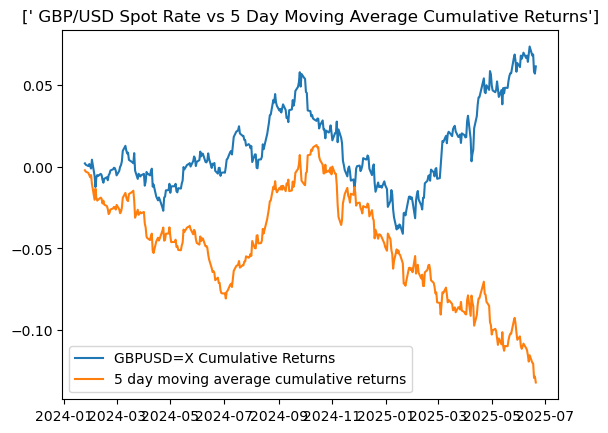

In [25]:
def get_data():
    df = yf.download(ticker, auto_adjust=True)
    df.columns = df.columns.get_level_values(0)
    df['MovingAverage'] = df['Close'].rolling(window).mean()
    df = df.iloc[-timespan:, :]
    return df


def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close'] > df['MovingAverage'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df


def test_strategy(df): # Plot the returns
    df['asset_cumulative'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['strategy_cumulative'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1
    return df

def main_function():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

def plot_function(df):
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{ticker} Cumulative Returns',f'{window} day moving average cumulative returns'])
    plt.title([f' GBP/USD Spot Rate vs {window} Day Moving Average Cumulative Returns'])
    return df

def return_summary(df):
    asset_return = df['asset_cumulative'].iloc[-1]*100
    strategy_return = df['strategy_cumulative'].iloc[-1]*100
    print(f"{ticker} Buy & Hold Return: {asset_return:.2f}%")
    print(f"{window}-Day MA Strategy Return: {strategy_return:.2f}%")


def run_all():
    df = main_function()
    df = test_strategy(df)
    df = plot_function(df)
    return_summary(df)
    return df

run_all()